# A Brief Token on Tokenizers

This limited time DLC post costs only 499 tokens to unlock.

Salman Naqvi  
Wednesday, 24 January 2024

> This notebook follows the [fastai style
> guide](https://docs.fast.ai/dev/style.html).

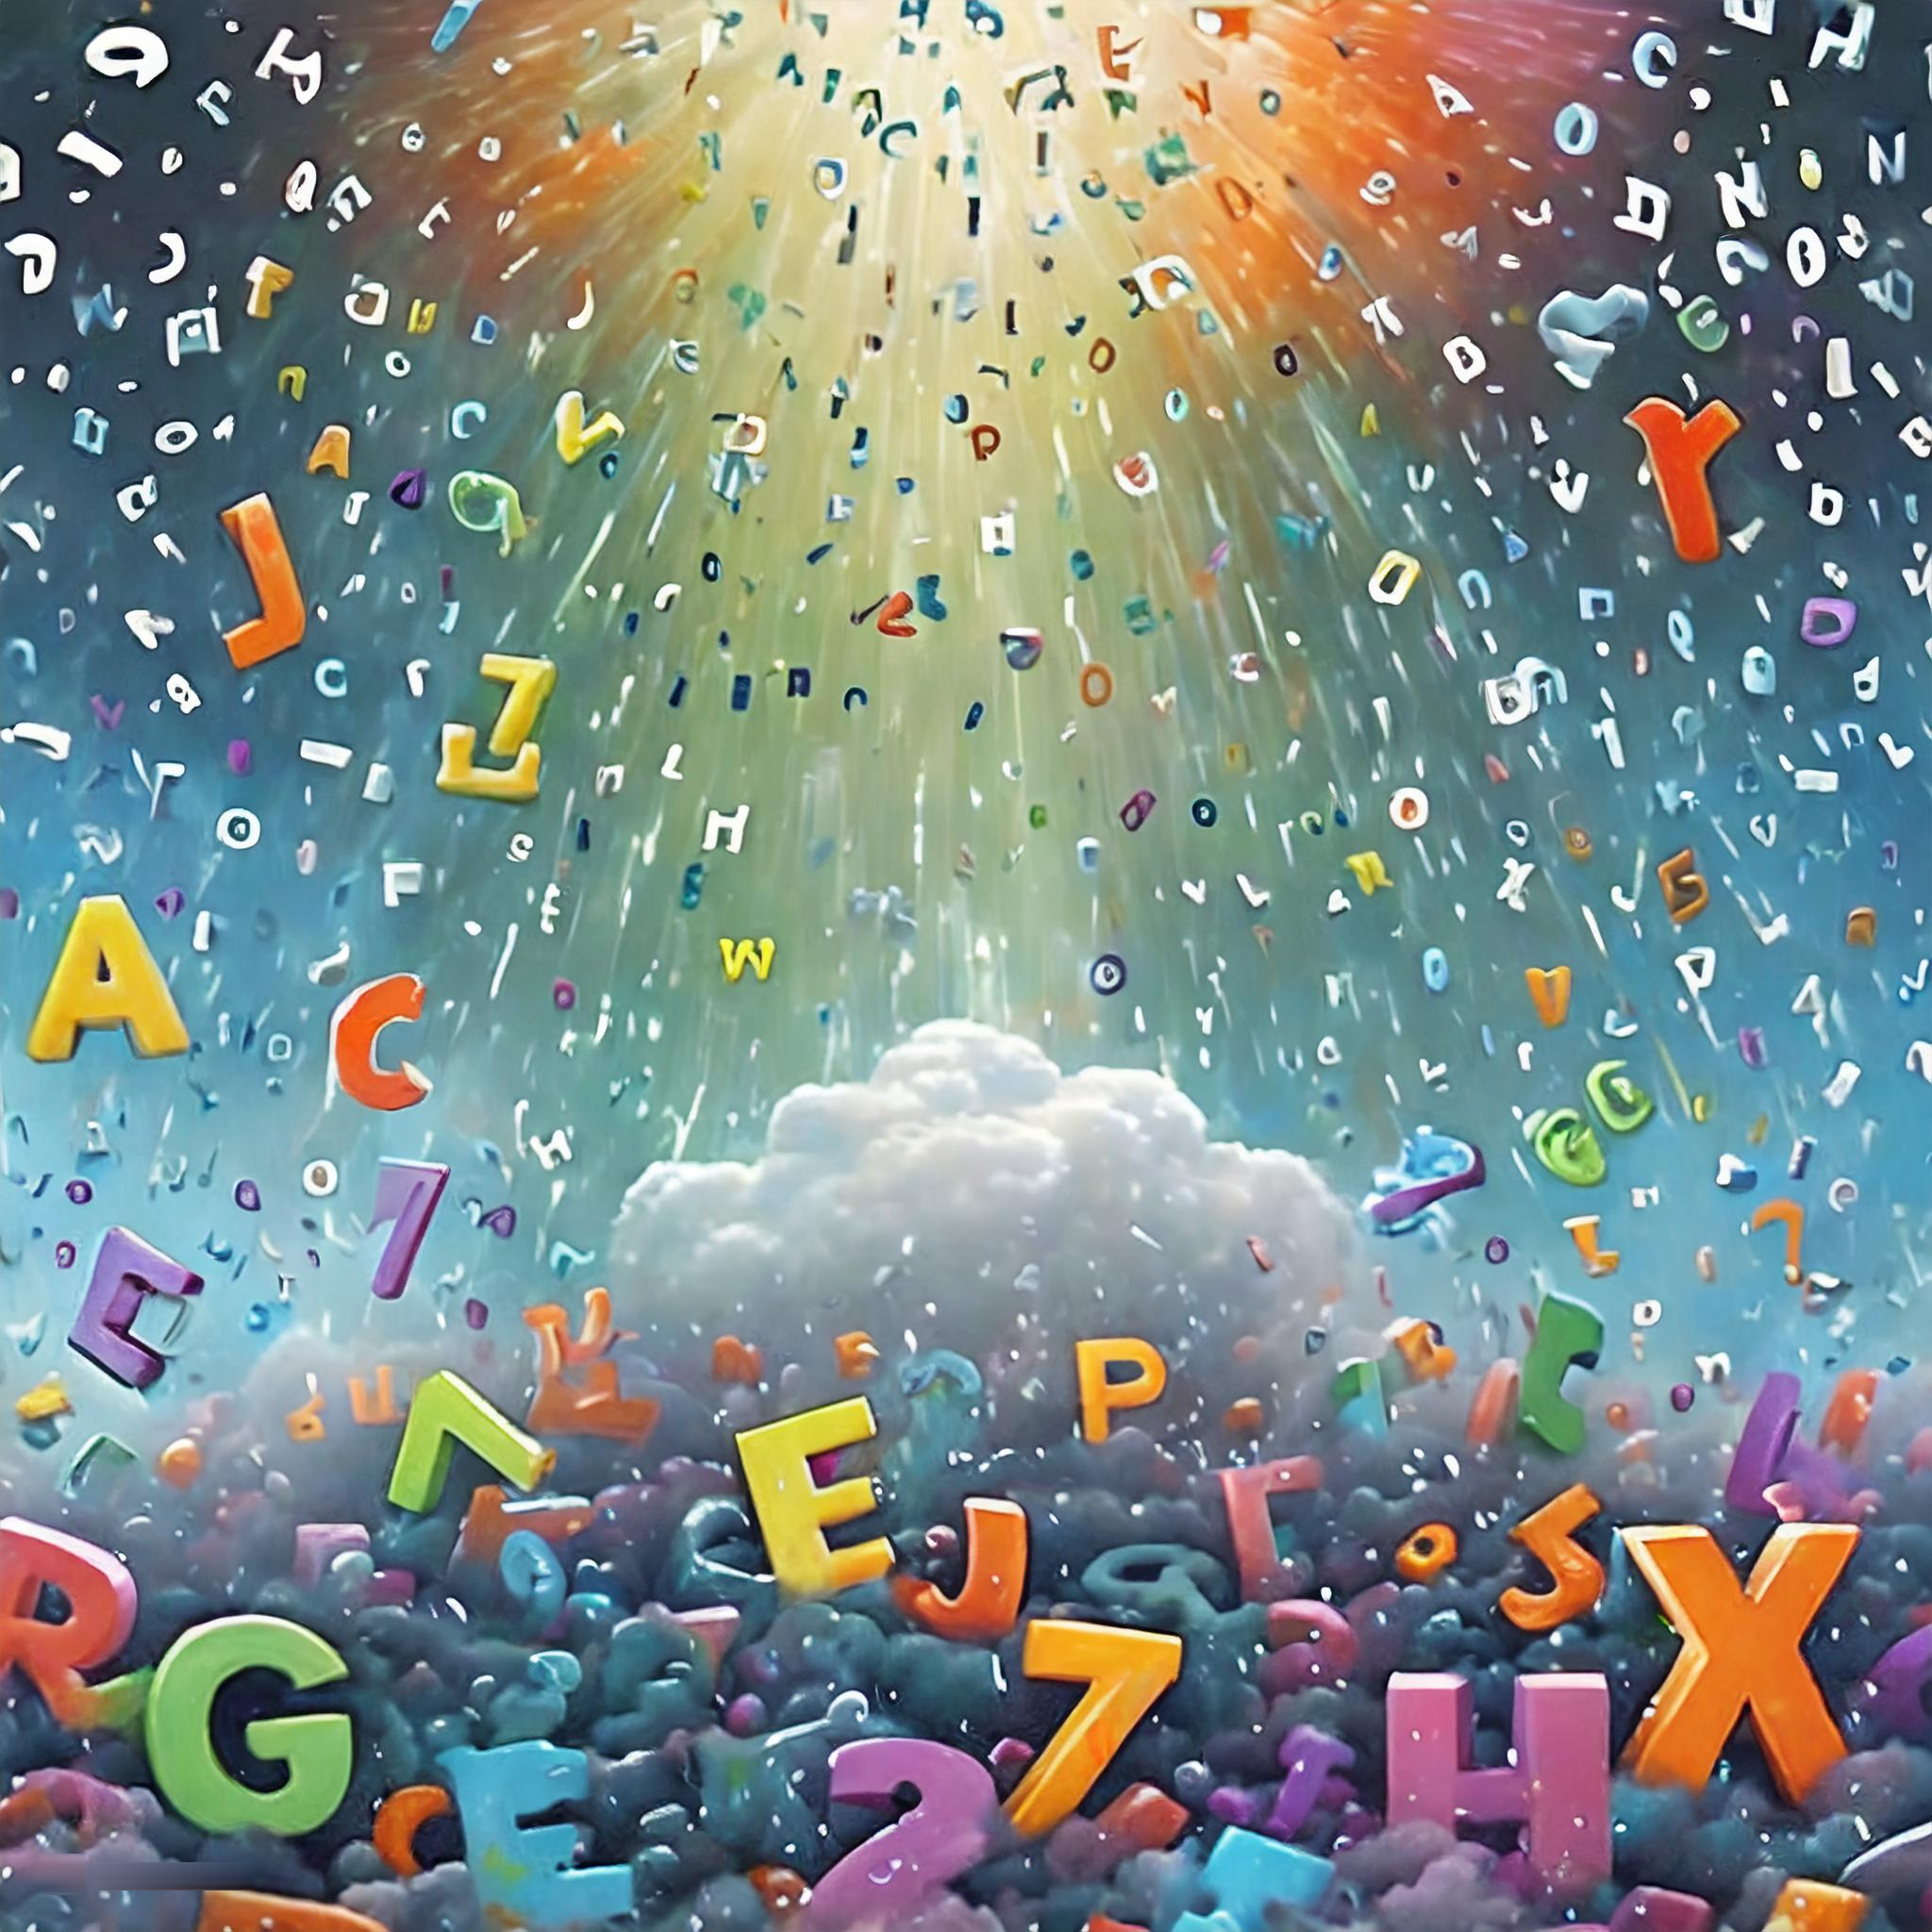

Tokenization is the process whereby text is given a numerical
representation. Sentences are split into components known as tokens.
These tokens represent numerical values that language models can work
with.

There are various approaches to tokenization. Examples include:

-   word-based tokenization
-   character-based tokenization
-   subword-based tokenization
-   and a whole lot more.

Language models require the use of their own tokenization technique to
properly work. Let’s have a look at three approaches.

## Word-based

The word-based approach, well, splits sentences into individual words.
In some cases, it also splits on punctuation.

In the example below, the sentence is tokenized into its words using
whitespace.

In [1]:
"I'm really excited doing this, you know?".split()

["I'm", 'really', 'excited', 'doing', 'this,', 'you', 'know?']

Let’s see it split based on its punctuation.

In [2]:
import re

seq = "I'm really excited doing this, you know?"
toks = re.findall(r'\w+|[^\w\s]+', seq); toks

['I', "'", 'm', 'really', 'excited', 'doing', 'this', ',', 'you', 'know', '?']

After tokenizing, an ID is assigned to each word, or token, so the model
can identify them.

The issue with the word-based approach is wend up with huge
vocabularies[1], especially when splitting on punctuation. For instance,
the English language has over 500,000 words, so we would also need more
than 500,000 tokens.

To remedy this, we could use only the $x$ most frequently used words
However, the issue that arises here is when the tokenizer encounters a
word not present in its vocabulary. In this situation, a token
representing the concept of “unknown” would be assigned[2]. When there
are many such tokens, the model has no way of “knowing” that these
tokens in fact represent different words.

Another issue with this approach is that the tokenizer will assign words
such as “car” and “cars” different tokens. The model will not know that
these two words are actually similar and represent almost the same
concept.

## Character-based

This approach splits text into characters, resulting in a much, much
smaller vocabulary – the English alphabet only has 26 letters, as
opposed to hundreds of thousands of words. It also results in fewer
unknown tokens as words are comprised from everything within the
vocabulary.

[1] A vocabulary is a collection of tokens.

[2] Examples of such tokens include \[UNK\] or \<unk\>.

In [3]:
list("Who doesn't love tokenization!")

['W',
 'h',
 'o',
 ' ',
 'd',
 'o',
 'e',
 's',
 'n',
 "'",
 't',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 't',
 'o',
 'k',
 'e',
 'n',
 'i',
 'z',
 'a',
 't',
 'i',
 'o',
 'n',
 '!']

However, this approach also has its drawbacks. Individual characters
hold less meaning than a whole word. For example, ‘t’ holds less meaning
than ‘tokenization’.

That said, this issue is not as prevalent in other languages. In Chinese
languages, each character is also a word. Therefore, characters in
Chinese languages hold less meaning than characters in Latin languages.

While there will be an overall smaller vocabulary, there will still be
much processing to do – we end up with a large amount of individual
tokens to process. ‘Hello!’ would need only a single token, where as
‘H’, ‘e’, ‘l’, ‘l’, ‘o’, and ‘!’ would require six tokens.

## Subword-based

This approach is a combination of the two approaches above, and is also
the approach most state-of-the-art tokenizers use today.

With subword-based tokenizers, words fall into two categories: frequent
words and rare words. Frequent words are not to be split, but rare words
are to be split into meaningful subwords.

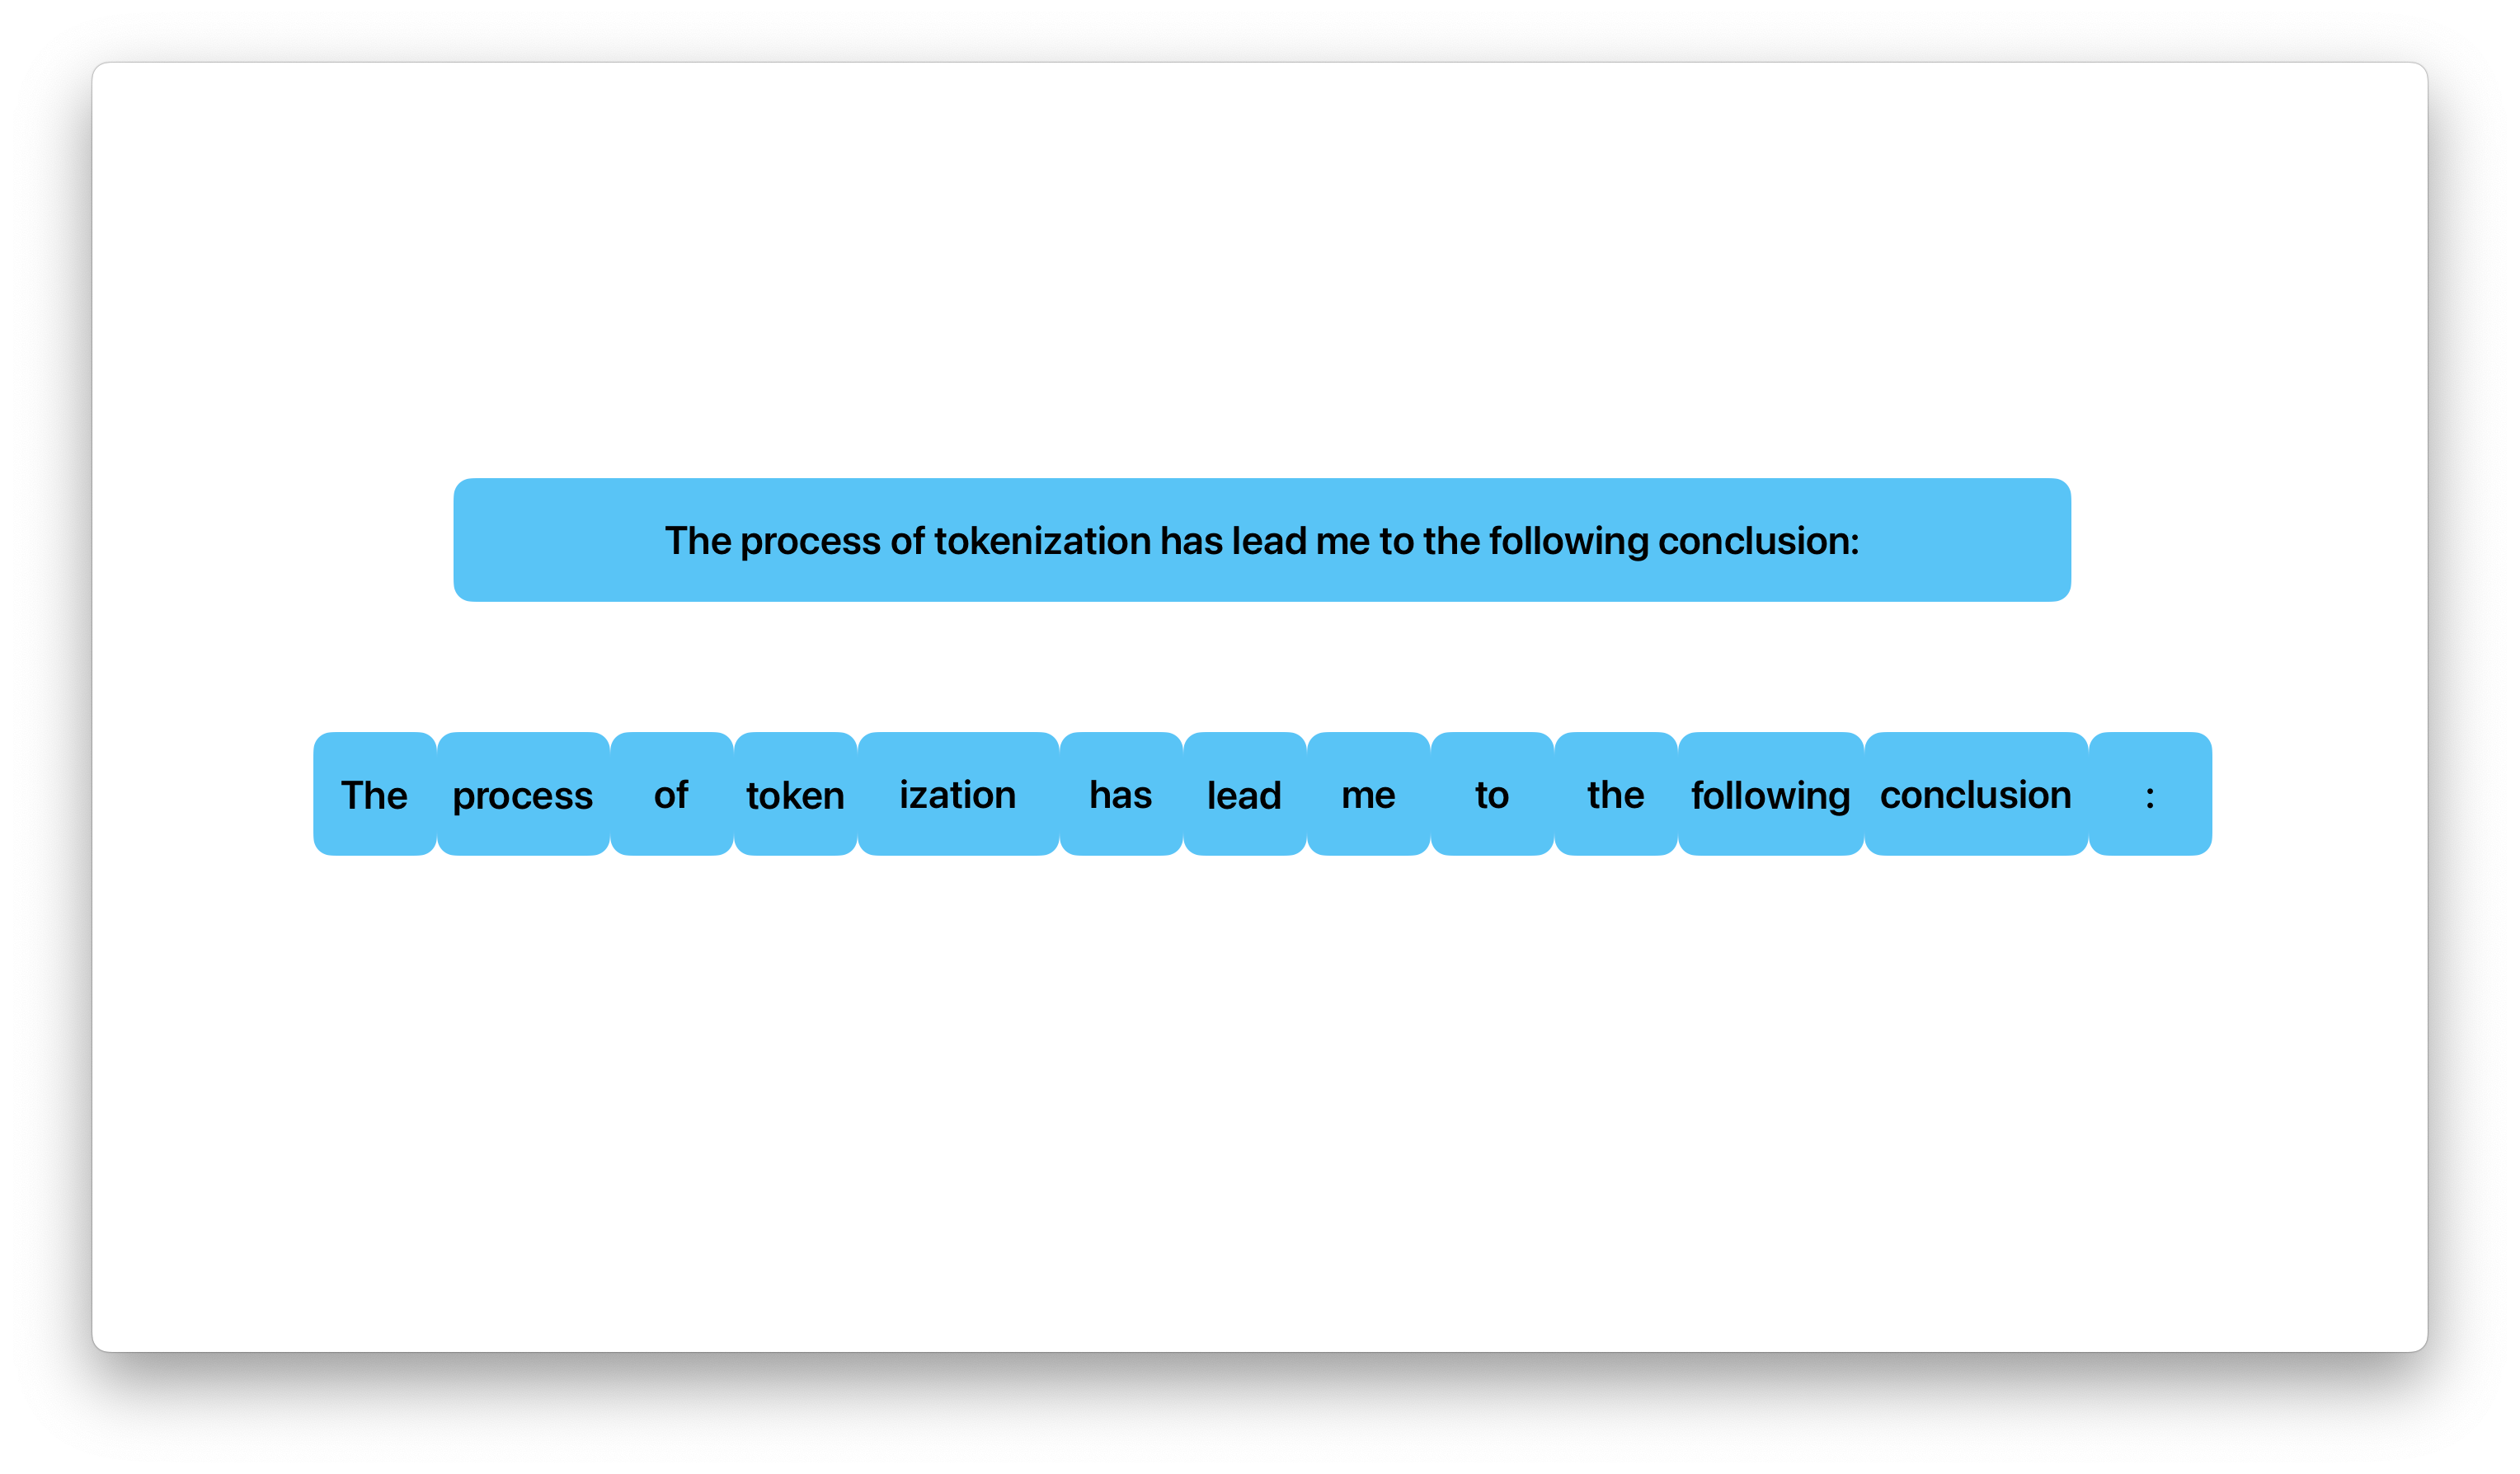

For example, ‘tokenization’ would be categorized as a rare word and
would be tokenized into the tokens ‘token’ and ‘ization’. Though one
word is now represented by two tokens, as opposed to a single token with
the word-based approach, it is split into two components that much more
frequently appear. We also don’t need eleven tokens, as would be with
the character-based approach. On top of that, the model would learn the
grammatical function of ‘ization’.

This is all while giving the model the ability to learn the meaning of
‘realization’ as the two tokens that comprise the word appear next to
each other

This approach allows us to have relatively good covereage for a language
while having relatively smaller vocabularies. It also results in minimal
unknown tokens.

## Tokenizing Time

If we draw parallels between a tokenizer and a model, the algorithm of a
tokenizer is akin to the architecture of a model. On a similar note, the
vocabulary of a tokenizer is akin to the weights of a model.

Let’s load in the tokenizer used for the [BERT base model
(cased)](https://huggingface.co/bert-base-cased).

In [4]:
! pip install -Uqq transformers

In [5]:
import logging; logging.disable(logging.WARNING)
from transformers import AutoTokenizer

tokz = AutoTokenizer.from_pretrained('bert-base-cased')

We can use the loaded tokenizer to directly tokenize our desired
sequence.

In [6]:
seq = "The process of tokenization has lead me to the appalling conclusion: life isn't what it is."
tokz(seq)

{'input_ids': [101, 1109, 1965, 1104, 22559, 2734, 1144, 1730, 1143, 1106, 1103, 12647, 5727, 1158, 6593, 131, 1297, 2762, 112, 189, 1184, 1122, 1110, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

However, let’s look behind the scenes to see what’s happening. We’ll
only focus on how `input_ids` came to be.

## Behind the Scenes

### Encoding

Encoding is the name given to the process whereby text is mapped to
numbers. Text is first tokenized, after which, the tokens are mapped to
their respective IDs.

#### Tokenization

In [7]:
toks = tokz.tokenize(seq); toks

['The',
 'process',
 'of',
 'token',
 '##ization',
 'has',
 'lead',
 'me',
 'to',
 'the',
 'app',
 '##all',
 '##ing',
 'conclusion',
 ':',
 'life',
 'isn',
 "'",
 't',
 'what',
 'it',
 'is',
 '.']

As we can see, the tokenizer used by the BERT base model (cased) is a
subword-based tokenizer. This can be seen by ‘tokenization’ being split
into ‘token’ and ‘##ization’, as well as ‘appalling’ being split into
‘app’, ‘##all’, and ‘##ing’.

#### Tokens to IDs

In [8]:
ids = tokz.convert_tokens_to_ids(toks); ids

[1109,
 1965,
 1104,
 22559,
 2734,
 1144,
 1730,
 1143,
 1106,
 1103,
 12647,
 5727,
 1158,
 6593,
 131,
 1297,
 2762,
 112,
 189,
 1184,
 1122,
 1110,
 119]

The numbers that have been assigned are based on the vocabulary of the
tokenizer. These IDs can now be used as input to a model.

## Decoding

Decoding is simply the opposite process: convert a sequence of IDs into
their respective tokens, including putting together tokens that were
part of the same word.

In [9]:
dec_seq = tokz.decode(ids); dec_seq

"The process of tokenization has lead me to the appalling conclusion : life isn't what it is."

The decoding algorithm of our tokenzier has introduced a space before
the colon. 🤔

Decoding is used for models that generate text: the model outputs a
sequence of IDs which are then decoded to their respective tokens.

## Conclusion

Tokenization is all about splitting text up and giving the split up text
a numerical representation that computers can work with.

If you have any comments, questions, suggestions, feedback, criticisms,
or corrections, please do post them down in the comment section below!